<a href="https://colab.research.google.com/github/anoopmanikantas/Time-Series-analysis-of-Satellite-data-Feature-extractions-on-Transitions/blob/main/Satellite_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff

Connect to drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying data from drive to colab local storage for faster access during training

In [7]:
!mkdir /content/data

In [8]:
!cp -r /content/drive/MyDrive/data/* /content/data

Constants


In [129]:
MAIN_DIR = '/content/data/'
img_id = 3
input_raster = MAIN_DIR+'mband/0{}.tif'.format(img_id)
mask_raster = MAIN_DIR+'gt_mband/0{}.tif'.format(img_id)

Visualization (under maintenance)


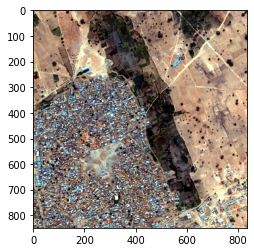

In [135]:
def stretch_8bit(bands, lower_percent=2, higher_percent=98):
    out = np.zeros_like(bands)
    for i in range(3):
        a = 0 
        b = 255 
        c = np.percentile(bands[:,:,i], lower_percent)
        d = np.percentile(bands[:,:,i], higher_percent)        
        t = a + (bands[:,:,i] - c) * (b - a) / (d - c)    
        t[t<a] = a
        t[t>b] = b
        out[:,:,i] =t
    return out.astype(np.uint8)    
def visualize(filename):
    img = tiff.imread(filename)
    img = np.rollaxis(img, 0, 3)
    img1 = np.zeros((img.shape[0],img.shape[1],3))
    img1[:,:,0] = img[:,:,4] #red
    img1[:,:,1] = img[:,:,2] #green
    img1[:,:,2] = img[:,:,1] #blue
    return stretch_8bit(img1)
img = visualize(input_raster)
plt.imshow(img)

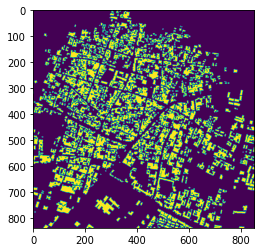

In [110]:
img = tiff.imread(mask_raster)
plt.imshow(img[0])

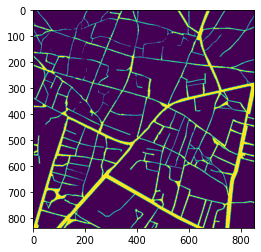

In [111]:
plt.imshow(img[1])

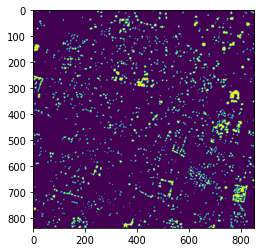

In [112]:
plt.imshow(img[2])

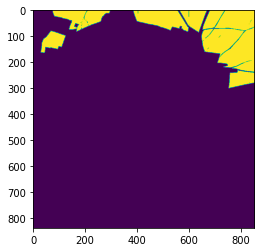

In [113]:
plt.imshow(img[3])

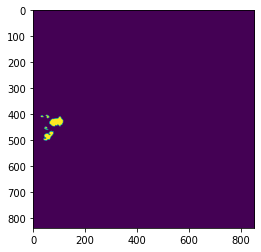

In [114]:
plt.imshow(img[4])

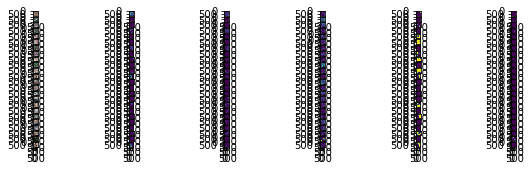

In [144]:
fig,ax = plt.subplots(24,6,figsize=(10,2.5))
for img_id in range(24):
  input_raster = MAIN_DIR+'mband/{}.tif'.format(str(img_id+1).zfill(2))
  mask_raster = MAIN_DIR+'gt_mband/{}.tif'.format(str(img_id+1).zfill(2))
  img_8_bit = visualize(input_raster)
  img_mask = tiff.imread(mask_raster)
  ax[img_id][0].imshow(img_8_bit)
  for mask in range(5):
    ax[img_id][mask+1].imshow(img_mask[mask])
